PUNTO 2


In [60]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def load_and_prepare_data():
    data = fetch_california_housing()
    X, y = data.data, data.target
    
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])  #excluye la columna de 1s
    X_test[:, :-1] = scaler.transform(X_test[:, :-1])
    
    return X_train, X_test, y_train, y_test

def pseudoinverse_solution(X, y):
    #(X^T X)^(-1) X^T y
    return np.linalg.inv(X.T @ X) @ X.T @ y

def gradient_descent_solution(X, y, learning_rate=0.01, tol=1e-6, max_iter=10000):
    n, d = X.shape
    w = np.zeros(d)
    trajectory = []
    errors = []
    
    for i in range(max_iter):
        gradient = -2 / n * X.T @ (y - X @ w)
        
        w -= learning_rate * gradient
        
        trajectory.append(w.copy())

        error = np.mean((y - X @ w)**2)
        errors.append(error)
        
        if np.linalg.norm(gradient) < tol:
            print(f"Convergencia alcanzada en {i + 1} iteraciones.")
            break
    else:
        print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    
    return w, np.array(trajectory), errors


Comparen la solución obtenida por la pseudoinversa con la solución iterativa del gradiente descendente para distintos valores de η.

In [61]:
def plot_ecm(errors, l_r, title):
    plt.figure(figsize=(10, 6))
    sigma_cuad = "$σ_{1}^{2}$"
    for idx,i in enumerate(errors):
        plt.plot(i, label=f"ECM con η = {l_r[idx]}/{sigma_cuad}")
    plt.xlabel("Iteraciones")
    plt.ylabel("ECM")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
Resultados:
Error en prueba (Analítico): 0.55589
Error en prueba (Gradiente Descendente): 5.42888


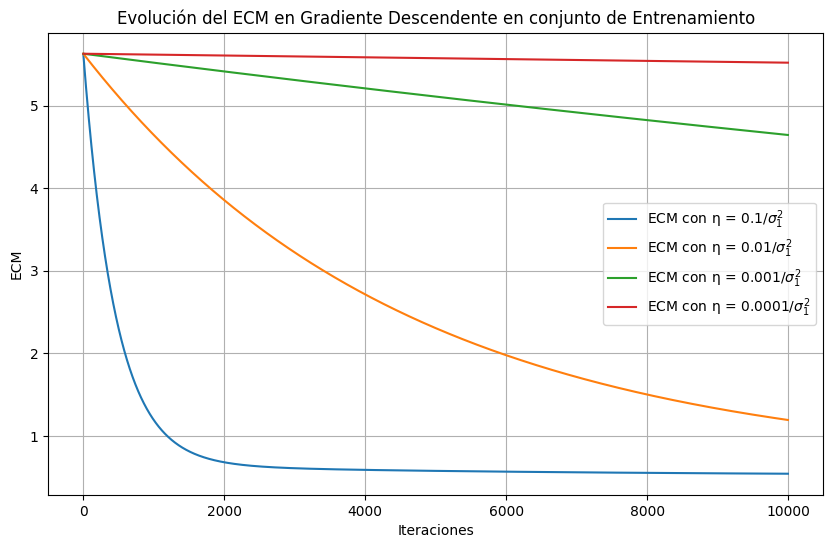

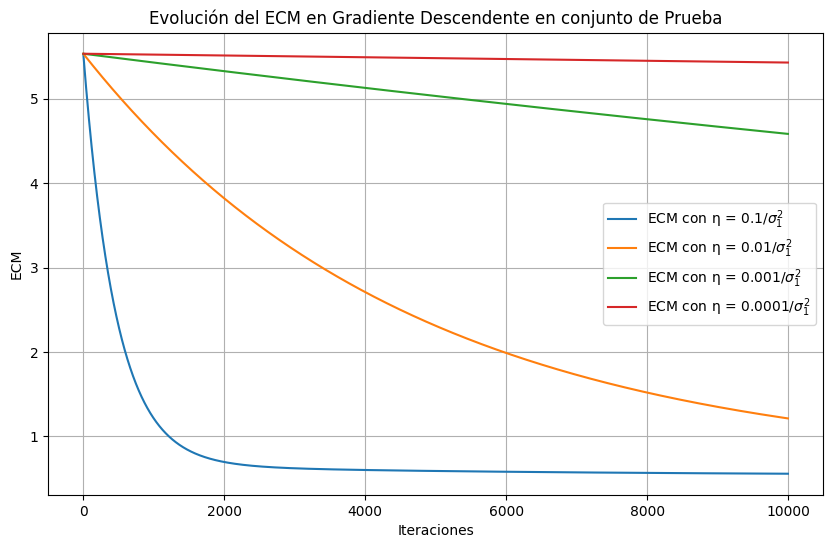

In [62]:
X_train, X_test, y_train, y_test = load_and_prepare_data()
    
w_analytical = pseudoinverse_solution(X_train, y_train)
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
sigma_cuad = S[0]

errorsTRAIN = []
errorsTEST= []

l_r = [0.1, 0.01, 0.001, 0.0001]
for i in l_r:
    w_gd, trajectory, errorTRAIN = gradient_descent_solution(X_train, y_train, learning_rate=i/sigma_cuad)
    errorsTRAIN.append(errorTRAIN)
    w_gd, trajectory, errorTEST = gradient_descent_solution(X_test, y_test, learning_rate=i/sigma_cuad)
    errorsTEST.append(errorTEST)

test_error_analytical = np.mean((y_test - X_test @ w_analytical)**2)
test_error_gd = np.mean((y_test - X_test @ w_gd)**2)

print("Resultados:")
print(f"Error en prueba (Analítico): {test_error_analytical:.5f}")
print(f"Error en prueba (Gradiente Descendente): {test_error_gd:.5f}")

plot_ecm(errorsTRAIN, l_r, "Evolución del ECM en Gradiente Descendente en conjunto de Entrenamiento")
plot_ecm(errorsTEST, l_r, "Evolución del ECM en Gradiente Descendente en conjunto de Prueba")
#plot_trajectory(trajectory)


Muestren el error en el conjunto de entrenamiento y de prueba frente al número de iteraciones para gradiente descendente.

In [63]:
X_train, X_test, y_train, y_test = load_and_prepare_data()
    
w_analytical = pseudoinverse_solution(X_train, y_train)
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
sigma_cuad = S[0]

errorsTRAIN = []
errorsTEST= []

w_gd, trajectory, errorTRAIN = gradient_descent_solution(X_train, y_train, learning_rate=1/sigma_cuad)
errorsTRAIN.append(errorTRAIN)
w_gd, trajectory, errorTEST = gradient_descent_solution(X_test, y_test, learning_rate=1/sigma_cuad)
errorsTEST.append(errorTEST)

train_error_analytical = np.mean((y_train - X_train @ w_analytical)**2)
train_error_gd = np.mean((y_train - X_train @ w_gd)**2)

test_error_analytical = np.mean((y_test - X_test @ w_analytical)**2)
test_error_gd = np.mean((y_test - X_test @ w_gd)**2)

print("Resultados:")
print(f"Error en entrenamiento (Analítico): {train_error_analytical:.5f}")
print(f"Error en entrenamiento (Gradiente Descendente): {train_error_gd:.5f}")

print(f"Error en prueba (Analítico): {test_error_analytical:.5f}")
print(f"Error en prueba (Gradiente Descendente): {test_error_gd:.5f}")


#plot_trajectory(trajectory)

No se alcanzó la convergencia en el número máximo de iteraciones.
No se alcanzó la convergencia en el número máximo de iteraciones.
Resultados:
Error en entrenamiento (Analítico): 0.51793
Error en entrenamiento (Gradiente Descendente): 0.90746
Error en prueba (Analítico): 0.55589
Error en prueba (Gradiente Descendente): 0.52942


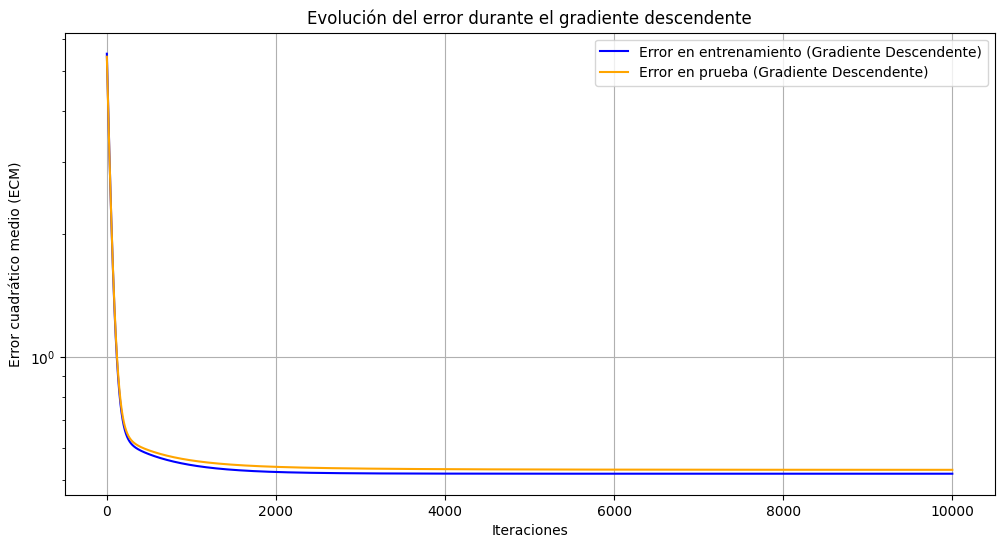

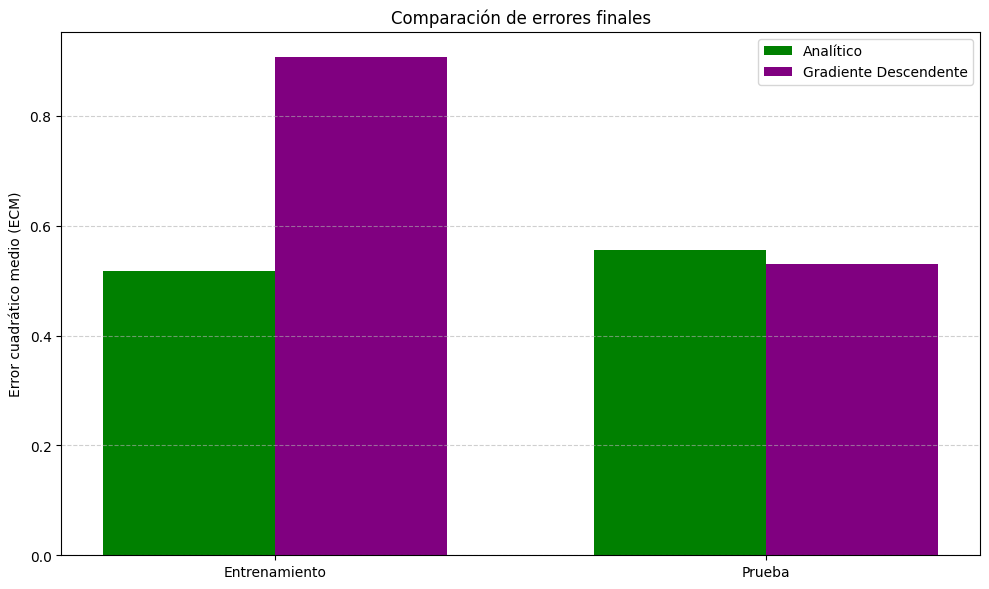

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def plot_error_evolution(errors_train, errors_test):
    plt.figure(figsize=(12, 6))
    plt.plot(errors_train[0], label="Error en entrenamiento (Gradiente Descendente)", color="blue")
    plt.plot(errors_test[0], label="Error en prueba (Gradiente Descendente)", color="orange")
    plt.xlabel("Iteraciones")
    plt.ylabel("Error cuadrático medio (ECM)")
    plt.title("Evolución del error durante el gradiente descendente")
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()

def plot_error_comparison(train_error_analytical, train_error_gd, test_error_analytical, test_error_gd):
    labels = ["Entrenamiento", "Prueba"]
    analytical_errors = [train_error_analytical, test_error_analytical]
    gd_errors = [train_error_gd, test_error_gd]

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, analytical_errors, width, label="Analítico", color="green")
    plt.bar(x + width/2, gd_errors, width, label="Gradiente Descendente", color="purple")
    plt.ylabel("Error cuadrático medio (ECM)")
    plt.title("Comparación de errores finales")
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(True, axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Llamadas a las funciones para graficar
plot_error_evolution(errorsTRAIN, errorsTEST)
plot_error_comparison(train_error_analytical, train_error_gd, test_error_analytical, test_error_gd)
